# **Final Project :2025S**

## Advanced Python AI and ML Tools

### Predictive Model Development with Modern Datasets and Visual Analytics

Data Source: https://survey.stackoverflow.co/
Stack Overflow Developer Survey (2023)

In May 2023 over 90,000 developers responded to our annual survey about how they learn and level up, which tools they're using, and which ones they want.

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [78]:
df_stack_overflow_2023 = pd.read_csv('/content/survey_results_public.csv')

In [79]:
print("Shape of dataset:", df_stack_overflow_2023.shape)
df_stack_overflow_2023.head()

Shape of dataset: (89184, 84)


,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [80]:
df_stack_overflow_2023.dtypes

,0
ResponseId,int64
Q120,object
MainBranch,object
Age,object
Employment,object
...,...
ProfessionalTech,object
Industry,object
SurveyLength,object
SurveyEase,object


### Convert  to Numeric and Drop all NA of CompTotal (Target)

In [81]:
# Convert CompTotal to numeric, coerce errors (turn invalid strings into NaN)
df_stack_overflow_2023["CompTotal"] = pd.to_numeric(df_stack_overflow_2023["CompTotal"], errors='coerce')

# Now drop actual NaN values
df_stack_overflow_2023 = df_stack_overflow_2023.dropna(subset=["CompTotal"])

print("NaN count in CompTotal:", df_stack_overflow_2023["CompTotal"].isna().sum())


NaN count in CompTotal: 0


###  Drop all rows where the Currency column does NOT contain "USD",

In [82]:
# Step: Filter dataset to include only respondents paid in USD and located in the United States

df_stack_overflow_2023 = df_stack_overflow_2023[
    df_stack_overflow_2023['Currency'].str.contains("USD", na=False) &
    df_stack_overflow_2023['Country'].str.contains("united states", case=False, na=False)
].copy()

# Check result
print("Shape after filtering for USD + USA:", df_stack_overflow_2023.shape)


Shape after filtering for USD + USA: (11896, 84)


### Double check that the COUNTRY field only contains United States of America or USA

In [83]:
#  Check the unique country values after filtering
print(df_stack_overflow_2023['Country'].unique())


['United States of America']


### Removing Irrelevant Columns

In [84]:
#  Define irrelevant, non-predictive, or intention-based columns to drop
irrelevant_cols = [
    'ResponseId', 'Q120', 'MainBranch', 'NEWSOSites',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq',
    'SOComm', 'SOAI', 'SurveyLength', 'SurveyEase',
    'ConvertedCompYearly', 'PurchaseInfluence', 'TechList',
    'BuyNewTool', 'AIAcc', 'AIBen', 'TBranch', 'Rate_to_USD',
    'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
    'WebframeWantToWorkWith', 'MiscTechWantToWorkWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsWantToWorkWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackSyncWantToWorkWith', 'AISearchWantToWorkWith', 'AIToolInterestedInUsing',
    'AIDevWantToWorkWith', 'AIToolInterested in Using', 'AIToolNot interested in Using',
    'AINextNeither different nor similar', 'AINextSomewhat similar',
    'AINextVery similar', 'AINextSomewhat different', 'AISent', 'AINextVery different',
    'CodingActivities', 'LearnCodeOnline', 'Country', 'Currency','LearnCode','TimeSearching','TimeAnswering','ProfessionalTech','CompTotalUSD Range'
]

# Step: Drop only columns that exist in the current DataFrame
df_stack_overflow_2023 = df_stack_overflow_2023.drop(
    columns=[col for col in irrelevant_cols if col in df_stack_overflow_2023.columns]
)

# Step: Print the new shape and list of remaining columns
print("Shape after dropping all irrelevant columns:", df_stack_overflow_2023.shape)
print("\nRemaining columns:\n", df_stack_overflow_2023.columns.tolist())


Shape after dropping all irrelevant columns: (11896, 39)

Remaining columns:
 ['Age', 'Employment', 'RemoteWork', 'EdLevel', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'CompTotal', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'AISearchHaveWorkedWith', 'AIDevHaveWorkedWith', 'AISelect', 'AIToolCurrently Using', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'Industry']


###  Dropping Columns with Excessive Missing Values - 70%

In [85]:
# Set the threshold for missing values (70% of total rows)
threshold = 0.7 * len(df_stack_overflow_2023)

#  Identify columns with ≥70% missing values
cols_to_drop = df_stack_overflow_2023.columns[
    df_stack_overflow_2023.isnull().sum() >= threshold
].tolist()

#  Drop these columns from the DataFrame
df_stack_overflow_2023 = df_stack_overflow_2023.drop(columns=cols_to_drop)

#  Display dropped columns and new DataFrame shape
print("Columns dropped due to ≥70% missing values:", cols_to_drop)
print("\nShape after dropping:", df_stack_overflow_2023.shape)


Columns dropped due to ≥70% missing values: ['AIDevHaveWorkedWith']

Shape after dropping: (11896, 38)


### Check if there are rows with more than 50% values missing, if there are drop it

In [86]:
#  Save the original number of rows before dropping
original_rows = df_stack_overflow_2023.shape[0]

#  Set threshold — keep only rows with at least 50% non-null values
row_threshold = int(0.5 * df_stack_overflow_2023.shape[1])

#  Drop rows where more than 50% of columns are missing
df_stack_overflow_2023 = df_stack_overflow_2023.dropna(thresh=row_threshold)

#  Calculate how many rows were dropped
rows_dropped = original_rows - df_stack_overflow_2023.shape[0]

# Print the result
print(f"Rows dropped due to >50% missing values: {rows_dropped}")
print("Shape after dropping incomplete rows:", df_stack_overflow_2023.shape)


Rows dropped due to >50% missing values: 555
Shape after dropping incomplete rows: (11341, 38)


###  Checking for Duplicate Columns

In [87]:
#  Check for duplicate column names in the DataFrame
duplicate_cols = df_stack_overflow_2023.columns[df_stack_overflow_2023.columns.duplicated()].tolist()

#  Display result
if duplicate_cols:
    print(f"Detected {len(duplicate_cols)} duplicate column(s):")
    for col in duplicate_cols:
        print(f" - {col}")
else:
    print("No duplicate columns found in the dataset.")


No duplicate columns found in the dataset.


### Standardizing Age Group Format

In [88]:
# Step: Standardize Age column by removing " years old"
# Purpose: Clean up the Age column by stripping out descriptive text like " years old" to retain clean age bins

df_stack_overflow_2023['Age'] = df_stack_overflow_2023['Age'].str.replace(' years old', '', regex=False).str.strip()

# Preview cleaned Age column
print("Cleaned Age column (removed 'years old'):")
print(df_stack_overflow_2023['Age'].head(10))


Cleaned Age column (removed 'years old'):
1     25-34
2     45-54
3     25-34
6     35-44
7     25-34
12    25-34
13    35-44
36    55-64
42    45-54
43    18-24
Name: Age, dtype: object


### Standardizing EdLevel Values

In [89]:
print(df_stack_overflow_2023['EdLevel'].unique())

['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else'
 'Primary/elementary school']


In [90]:
#  Clean up EdLevel column by removing text inside parentheses
# Purpose: Standardize education levels by removing extra details in parentheses

df_stack_overflow_2023['EdLevel'] = df_stack_overflow_2023['EdLevel'].str.replace(r"\s*\(.*?\)", "", regex=True).str.strip()

# Preview cleaned EdLevel values
print("Cleaned EdLevel values:")
print(df_stack_overflow_2023['EdLevel'].head(10))


Cleaned EdLevel values:
1                                     Bachelor’s degree
2                                     Bachelor’s degree
3                                     Bachelor’s degree
6     Some college/university study without earning ...
7                                     Bachelor’s degree
12                                    Bachelor’s degree
13                                      Master’s degree
36    Some college/university study without earning ...
42                                    Bachelor’s degree
43    Some college/university study without earning ...
Name: EdLevel, dtype: object


### Convert OrgSize Ranges to Numeric Midpoints

In [91]:
# Check Unique Values in OrgSize Column

print(df_stack_overflow_2023['OrgSize'].unique())



['2 to 9 employees' '5,000 to 9,999 employees' '100 to 499 employees'
 '1,000 to 4,999 employees' '10 to 19 employees'
 '10,000 or more employees' '500 to 999 employees' '20 to 99 employees'
 'Just me - I am a freelancer, sole proprietor, etc.' 'I don’t know' nan]


In [92]:
#  Standardize OrgSize column
# Purpose: Remove 'employees' and replace ' to ' with '-' for consistency

df_stack_overflow_2023['OrgSize'] = (
    df_stack_overflow_2023['OrgSize']
    .str.replace('employees', '', regex=False)
    .str.replace(' to ', '-', regex=False)
    .str.strip()
)

# Preview cleaned OrgSize values
print("Cleaned OrgSize values:")
print(df_stack_overflow_2023['OrgSize'].unique())


Cleaned OrgSize values:
['2-9' '5,000-9,999' '100-499' '1,000-4,999' '10-19' '10,000 or more'
 '500-999' '20-99' 'Just me - I am a freelancer, sole proprietor, etc.'
 'I don’t know' nan]


### Standardizing YearsCode and YearsCodePro

In [93]:
# Check unique values before conversion (if not yet cleaned)
print("Unique values in YearsCode:")
print(df_stack_overflow_2023['YearsCode'].unique())

print("\nUnique values in YearsCodePro:")
print(df_stack_overflow_2023['YearsCodePro'].unique())


Unique values in YearsCode:
['18' '27' '12' '4' '5' '10' '33' '21' '3' '29' '20' '14' '8' '30' '23'
 '35' '11' '41' '19' '16' '22' '15' '17' '26' '13' '25' '7' '43' '6' '9'
 '42' '40' 'More than 50 years' '45' '28' '37' '24' '2' '48' '38' '34'
 '39' '36' '31' '32' '44' '47' '50' '46' 'Less than 1 year' '49' nan '1']

Unique values in YearsCodePro:
['9' '23' '7' '3' 'Less than 1 year' '15' '16' '2' '24' '10' '12' '6' '20'
 '25' '19' '27' '29' '11' '14' '13' '4' '28' '5' '8' '42' '17' '21' '26'
 '31' 'More than 50 years' '1' '36' '30' '33' '22' '39' '40' '18' '32'
 '44' nan '34' '37' '41' '35' '38' '48' '50' '43' '45' '49' '46' '47']


In [94]:
# Map special cases to numeric values
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Apply mapping and convert to numeric
for col in ['YearsCode', 'YearsCodePro']:
    df_stack_overflow_2023[col] = df_stack_overflow_2023[col].replace(years_mapping)
    df_stack_overflow_2023[col] = pd.to_numeric(df_stack_overflow_2023[col], errors='coerce')

# Preview result
print(df_stack_overflow_2023[['YearsCode', 'YearsCodePro']].dtypes)
print(df_stack_overflow_2023[['YearsCode', 'YearsCodePro']].head(10))


YearsCode       float64
YearsCodePro    float64
dtype: object
    YearsCode  YearsCodePro
1        18.0           9.0
2        27.0          23.0
3        12.0           7.0
6         4.0           3.0
7         5.0           3.0
12       10.0           9.0
13        5.0           0.5
36       33.0          15.0
42       21.0          16.0
43        3.0           2.0


### Standardizing Frequency_1, Frequency_2, and Frequency_3

In [95]:
# Check unique values in Frequency_1, Frequency_2, and Frequency_3
print("Unique values in Frequency_1:")
print(df_stack_overflow_2023['Frequency_1'].unique())

print("\nUnique values in Frequency_2:")
print(df_stack_overflow_2023['Frequency_2'].unique())

print("\nUnique values in Frequency_3:")
print(df_stack_overflow_2023['Frequency_3'].unique())


Unique values in Frequency_1:
['1-2 times a week' '6-10 times a week' nan 'Never' '3-5 times a week'
 '10+ times a week']

Unique values in Frequency_2:
['10+ times a week' '6-10 times a week' '3-5 times a week' nan
 '1-2 times a week' 'Never']

Unique values in Frequency_3:
['Never' '3-5 times a week' '1-2 times a week' nan '6-10 times a week'
 '10+ times a week']


In [96]:
# Only clean the text by removing " times a week"
for col in ['Frequency_1', 'Frequency_2', 'Frequency_3']:
    df_stack_overflow_2023[col] = df_stack_overflow_2023[col].str.replace(' times a week', '', regex=False)

# Preview to confirm cleanup
for col in ['Frequency_1', 'Frequency_2', 'Frequency_3']:
    print(f"\nUnique values in {col}:")
    print(df_stack_overflow_2023[col].unique())



Unique values in Frequency_1:
['1-2' '6-10' nan 'Never' '3-5' '10+']

Unique values in Frequency_2:
['10+' '6-10' '3-5' nan '1-2' 'Never']

Unique values in Frequency_3:
['Never' '3-5' '1-2' nan '6-10' '10+']


### Inspect Data Types (object, int, float)

In [97]:
# Check the final data types
df_stack_overflow_2023.dtypes


,0
Age,object
Employment,object
RemoteWork,object
EdLevel,object
LearnCodeCoursesCert,object
YearsCode,float64
YearsCodePro,float64
DevType,object
OrgSize,object
CompTotal,float64


# Exploratory Data Analysis

### Age Distribution of Stack Overflow Respondents

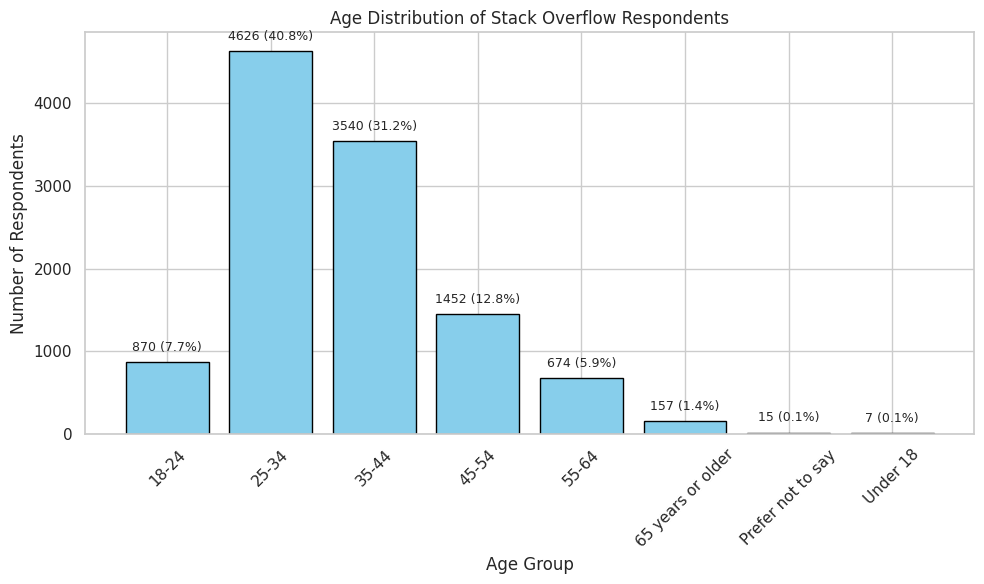

In [98]:
import matplotlib.pyplot as plt

# Count age groups
age_counts = df_stack_overflow_2023['Age'].value_counts().sort_index()
age_percent = round((age_counts / age_counts.sum()) * 100, 1)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')

# Add value and % on top of bars
for bar, count, pct in zip(bars, age_counts.values, age_percent.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{count} ({pct}%)', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.title("Age Distribution of Stack Overflow Respondents")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


### Working Arrangement

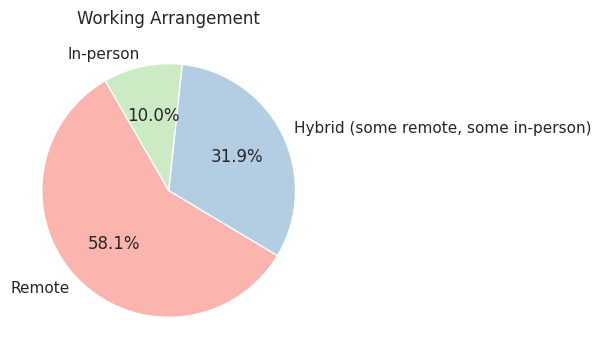

In [99]:
import matplotlib.pyplot as plt

# Value counts for RemoteWork column
work_counts = df_stack_overflow_2023['RemoteWork'].value_counts()
work_percent = (work_counts / work_counts.sum()) * 100

# Plot
colors = ['#fbb4ae', '#b3cde3', '#ccebc5']  # Optional pastel color scheme
plt.figure(figsize=(6, 6))
plt.pie(work_percent, labels=work_counts.index, autopct='%1.1f%%', colors=colors, startangle=120)
plt.title('Working Arrangement')
plt.tight_layout()
plt.show()


### Education Level Distribution of Developers

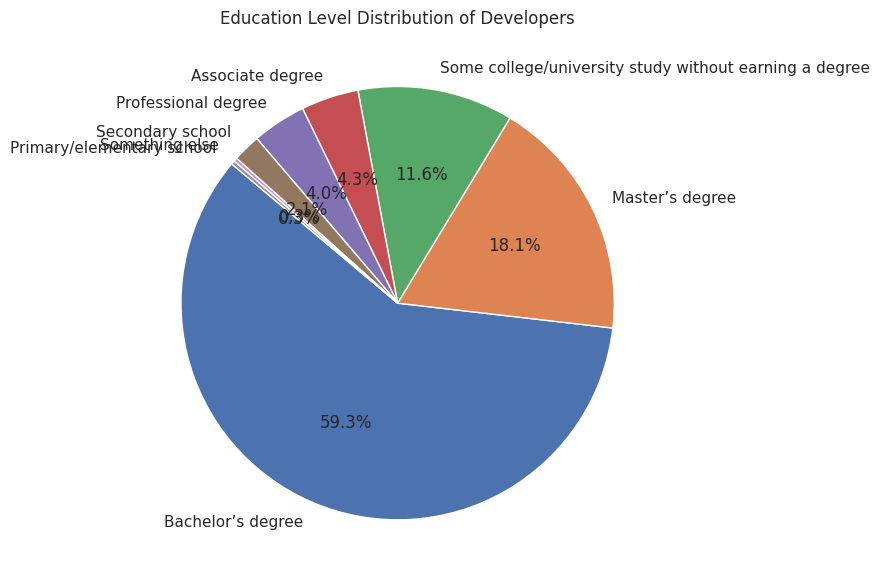

In [100]:
import matplotlib.pyplot as plt

# Count and percentage for education level
edu_counts = df_stack_overflow_2023['EdLevel'].value_counts()
edu_percent = (edu_counts / edu_counts.sum()) * 100

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(edu_percent, labels=edu_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Education Level Distribution of Developers')
plt.tight_layout()
plt.show()


### Understanding the Salary Distribution by Age Group

/tmp/ipython-input-1917030119.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


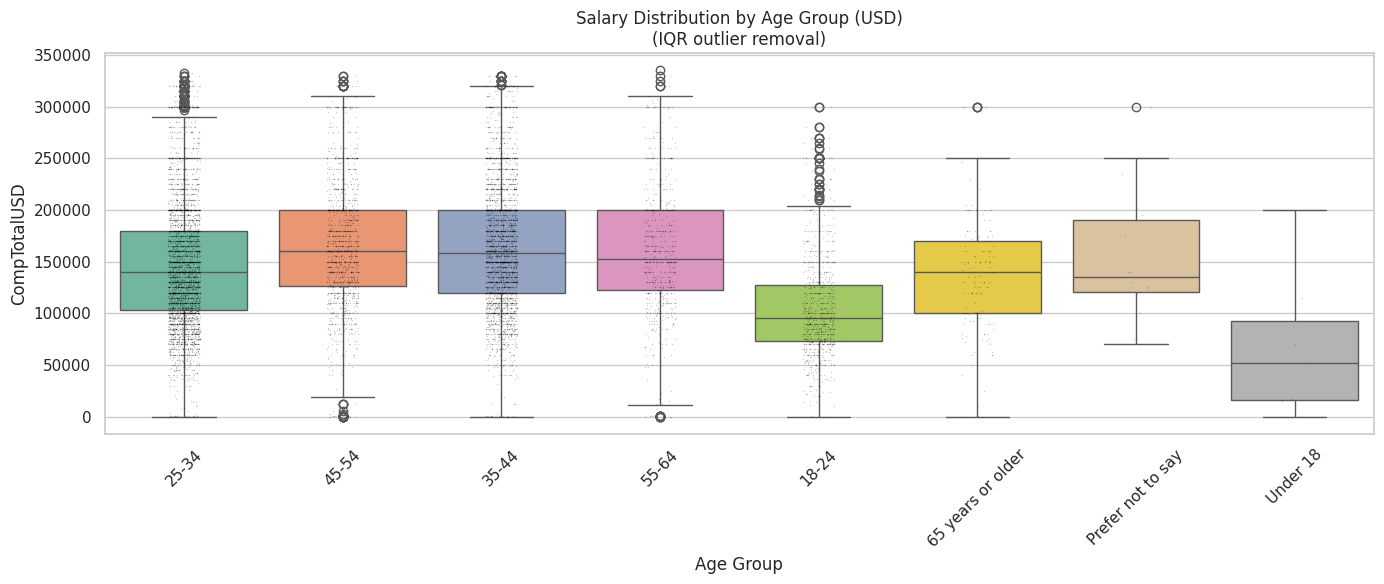

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove outliers using IQR for 'CompTotalUSD'
Q1 = df_stack_overflow_2023['CompTotal'].quantile(0.25)
Q3 = df_stack_overflow_2023['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Filtered DataFrame
df_filtered = df_stack_overflow_2023[
    (df_stack_overflow_2023['CompTotal'] >= Q1 - 1.5 * IQR) &
    (df_stack_overflow_2023['CompTotal'] <= Q3 + 1.5 * IQR)
]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Age',
    y='CompTotal',
    data=df_filtered,
    showfliers=True,  # optional: show dots
    palette='Set2'
)
sns.stripplot(
    x='Age',
    y='CompTotal',
    data=df_filtered,
    color='black',
    size=1,
    jitter=True,
    alpha=0.2
)

plt.title('Salary Distribution by Age Group (USD)\n(IQR outlier removal)')
plt.xlabel('Age Group')
plt.ylabel('CompTotalUSD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 10 Developer Types

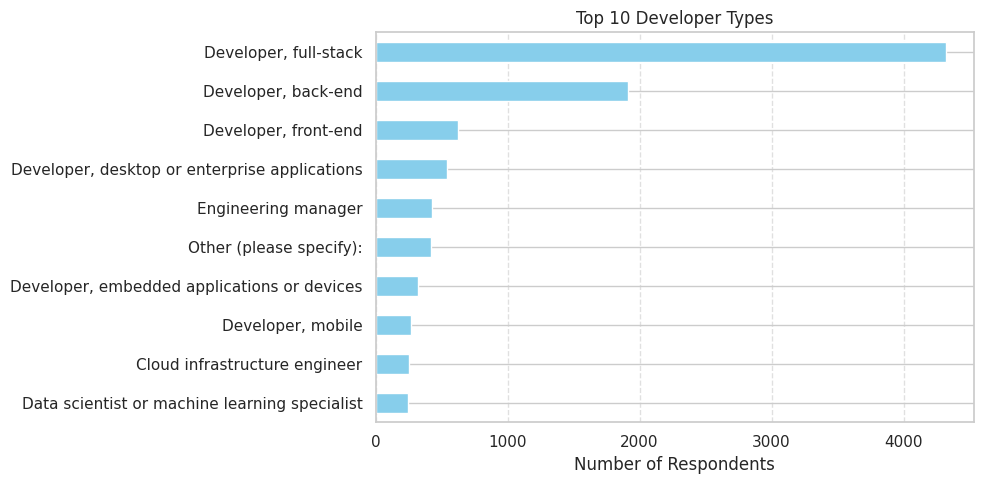

In [102]:
import matplotlib.pyplot as plt

# Assume `top_dev_types` is already a Series or DataFrame with top 10 values
# If not, compute it like this:
top_dev_types = df_stack_overflow_2023['DevType'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_dev_types.sort_values().plot(kind='barh', color='skyblue')

plt.title('Top 10 Developer Types')
plt.xlabel('Number of Respondents')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Total Years of Coding Experience by Age Group

/tmp/ipython-input-3916919333.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


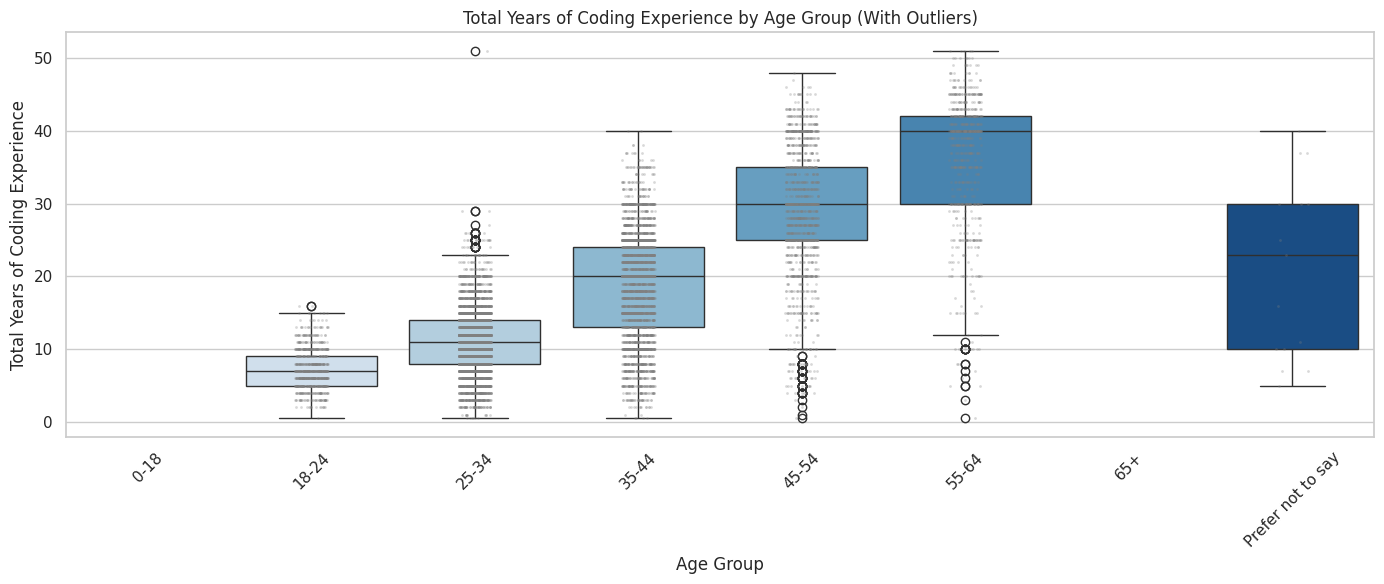

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cleaned DataFrame assumed loaded as:
# df_stack_overflow_2023

# Extract relevant columns
df_exp = df_stack_overflow_2023[['Age', 'YearsCode']].copy()
df_exp.dropna(inplace=True)

# Convert to numeric
df_exp['YearsCode'] = pd.to_numeric(df_exp['YearsCode'], errors='coerce')

# Keep only valid age groups
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']
df_exp = df_exp[df_exp['Age'].isin(age_order)]

# Plot: WITH outliers
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_exp,
    x='Age',
    y='YearsCode',
    order=age_order,
    palette='Blues'
)
sns.stripplot(
    data=df_exp,
    x='Age',
    y='YearsCode',
    order=age_order,
    color='gray',
    alpha=0.3,
    jitter=True,
    size=2
)

plt.title('Total Years of Coding Experience by Age Group (With Outliers)')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("years_experience_by_age_with_outliers.png", dpi=300)
plt.show()


### Total Years of Coding Experience by Age Group, using IQR-filtered data

/tmp/ipython-input-2847006315.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_exp_iqr = df_exp.groupby('Age', group_keys=False).apply(filter_iqr)
/tmp/ipython-input-2847006315.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


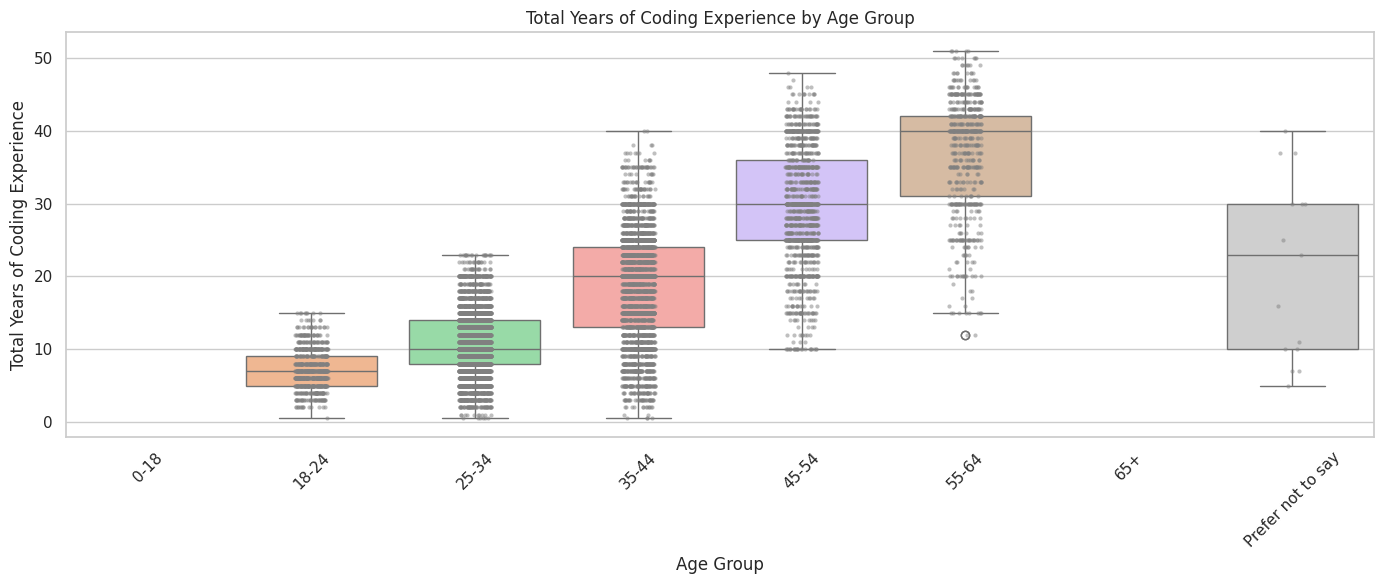

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your cleaned DataFrame is already loaded as:
# df_stack_overflow_2023

# Keep only relevant columns
df_exp = df_stack_overflow_2023[['Age', 'YearsCode']].copy()

# Drop rows with missing values
df_exp.dropna(inplace=True)

# Convert YearsCode to numeric (if not already)
df_exp['YearsCode'] = pd.to_numeric(df_exp['YearsCode'], errors='coerce')

# Define age group order
age_order = ['0-18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say']

# Filter to known age groups only
df_exp = df_exp[df_exp['Age'].isin(age_order)]

# IQR Filtering (per age group)
def filter_iqr(group):
    q1 = group['YearsCode'].quantile(0.25)
    q3 = group['YearsCode'].quantile(0.75)
    iqr = q3 - q1
    return group[(group['YearsCode'] >= q1 - 1.5 * iqr) & (group['YearsCode'] <= q3 + 1.5 * iqr)]

df_exp_iqr = df_exp.groupby('Age', group_keys=False).apply(filter_iqr)

# Plot: Boxplot with jitter (filtered)
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_exp_iqr,
    x='Age',
    y='YearsCode',
    order=age_order,
    palette='pastel'
)
sns.stripplot(
    data=df_exp_iqr,
    x='Age',
    y='YearsCode',
    order=age_order,
    color='gray',
    alpha=0.5,
    jitter=True,
    size=3
)

# Titles and labels
plt.title('Total Years of Coding Experience by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Years of Coding Experience')
plt.xticks(rotation=45)

# Optional: save to file
plt.tight_layout()
plt.savefig("total_years_experience_by_age_group.png", dpi=300)
plt.show()


### Education Level vs. Salary

/tmp/ipython-input-173042847.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


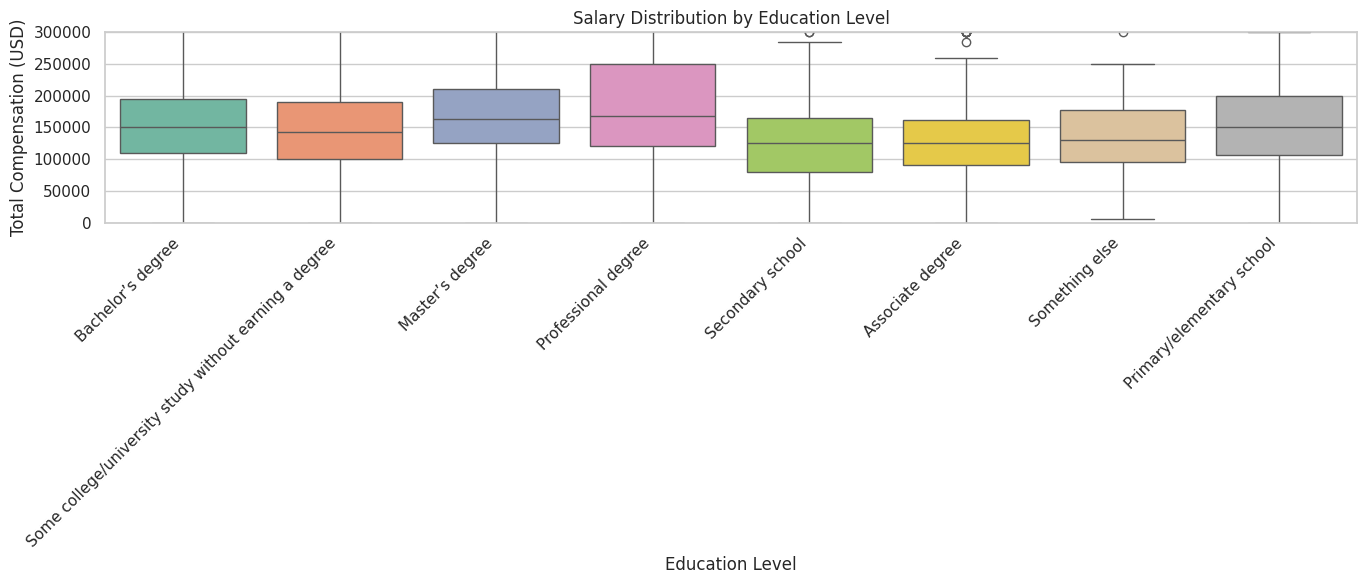

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_stack_overflow_2023,
    x="EdLevel",
    y="CompTotal",
    palette="Set2"
)

# Enhance readability
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300000)  # You can adjust this based on outlier removal
plt.title("Salary Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Total Compensation (USD)")

plt.tight_layout()
plt.show()


### Salary vs. Remote Work Status

/tmp/ipython-input-3378347748.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


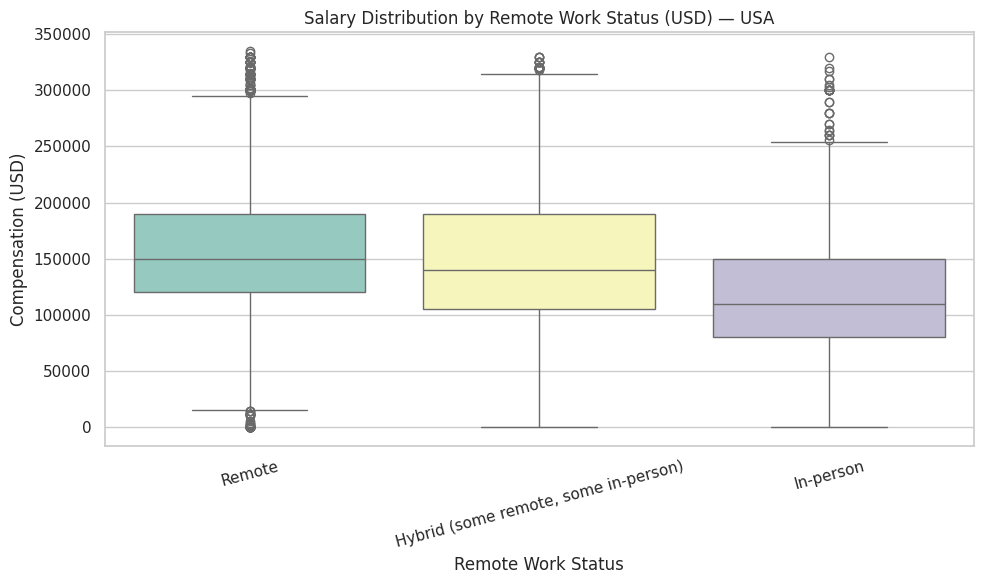

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter: non-null salary + remote work responses
df_remote_salary = df_stack_overflow_2023[
    (df_stack_overflow_2023['RemoteWork'].notna()) &
    (df_stack_overflow_2023['CompTotal'].notna())
]

# Optional: remove extreme outliers (IQR-based)
Q1 = df_remote_salary['CompTotal'].quantile(0.25)
Q3 = df_remote_salary['CompTotal'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_remote_salary[
    (df_remote_salary['CompTotal'] >= Q1 - 1.5 * IQR) &
    (df_remote_salary['CompTotal'] <= Q3 + 1.5 * IQR)
]

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_df,
    x='RemoteWork',
    y='CompTotal',
    palette='Set3'
)
plt.title('Salary Distribution by Remote Work Status (USD) — USA')
plt.ylabel('Compensation (USD)')
plt.xlabel('Remote Work Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### Heatmap of Salary Correlation (numeric fields)

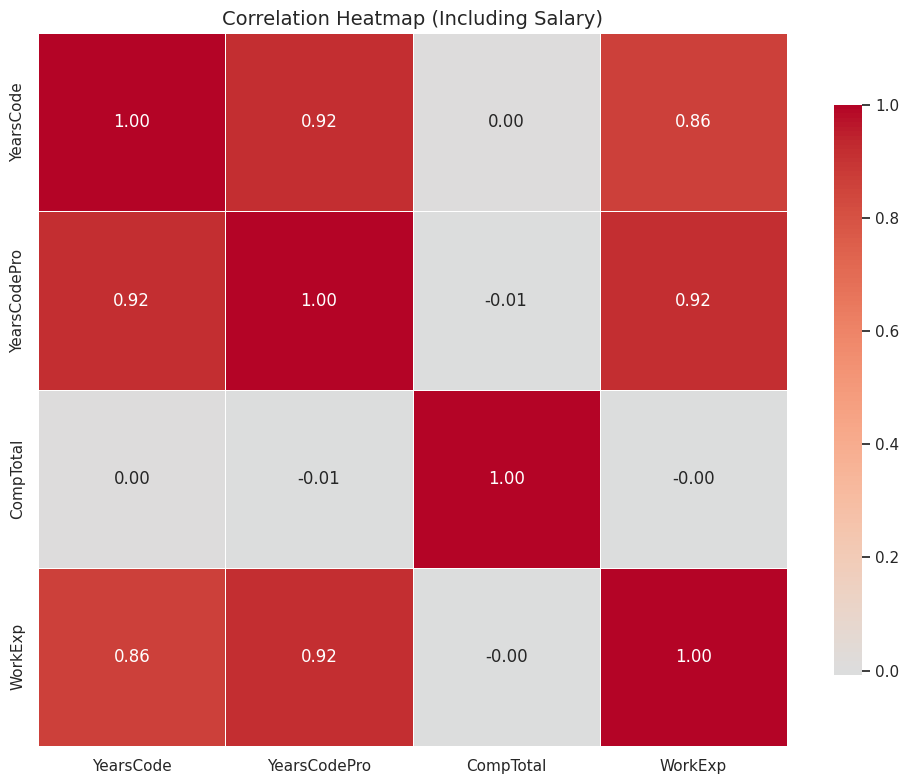

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_cols = df_stack_overflow_2023.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Including Salary)", fontsize=14)
plt.tight_layout()
plt.show()


### Most Common Languages

/tmp/ipython-input-2226726317.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.values, y=top_langs.index, palette='crest')


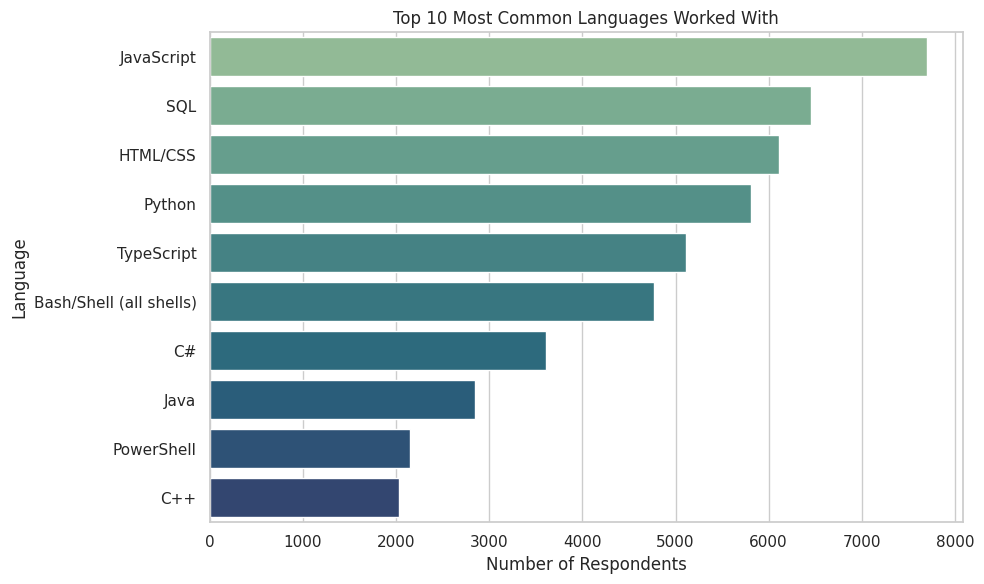

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split multi-label responses for languages
lang_series = df_stack_overflow_2023['LanguageHaveWorkedWith'].dropna().str.split(';')
lang_flat = pd.Series([lang.strip() for sublist in lang_series for lang in sublist])

# Count top 10 languages
top_langs = lang_flat.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_langs.values, y=top_langs.index, palette='crest')
plt.title("Top 10 Most Common Languages Worked With")
plt.xlabel("Number of Respondents")
plt.ylabel("Language")
plt.tight_layout()
plt.show()


### Most Common Languages

/tmp/ipython-input-656029804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='flare')


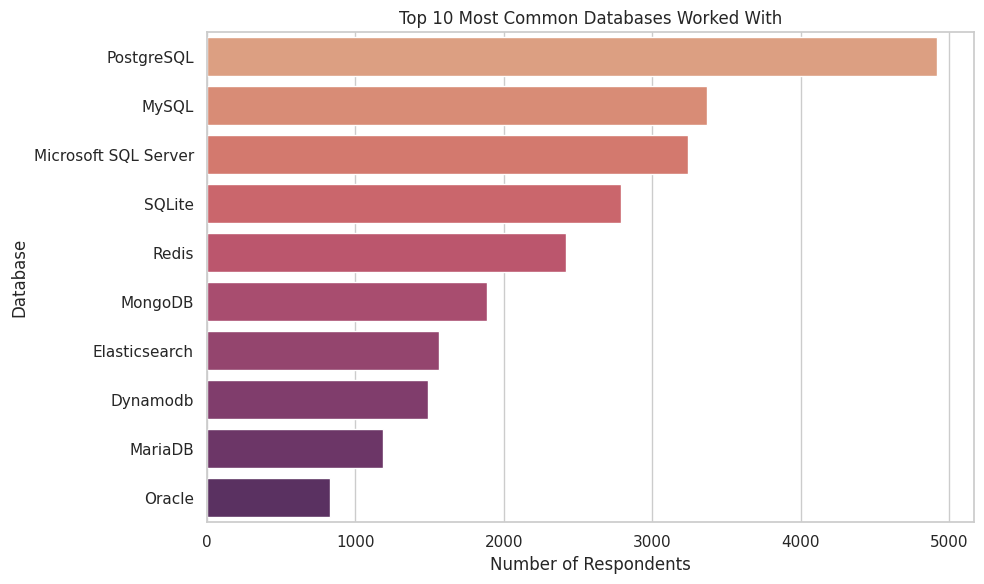

In [109]:
# Split and flatten database column
db_series = df_stack_overflow_2023['DatabaseHaveWorkedWith'].dropna().str.split(';')
db_flat = pd.Series([db.strip() for sublist in db_series for db in sublist])

# Count top 10 databases
top_dbs = db_flat.value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dbs.values, y=top_dbs.index, palette='flare')
plt.title("Top 10 Most Common Databases Worked With")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.show()


In [110]:
# Save cleaned data to CSV
df_stack_overflow_2023.to_csv('stack_overflow_cleaned.csv', index=False)


In [111]:
df_stack_overflow_2023.dtypes

,0
Age,object
Employment,object
RemoteWork,object
EdLevel,object
LearnCodeCoursesCert,object
YearsCode,float64
YearsCodePro,float64
DevType,object
OrgSize,object
CompTotal,float64
